Using Rob Mulla's guide ... https://www.youtube.com/watch?v=xi0vhXFPegw

In [331]:
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
import seaborn as sns
plt.style.use('ggplot')
pd.options.display.max_columns : 200

In [332]:
df = pd.read_csv("train.csv")

# Understanding the data

In [333]:
df.shape

(891, 12)

In [334]:
df.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [335]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [336]:
print(df.columns, df.dtypes)

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object') PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object


In [337]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


# Preparing the data

## Dropping unwanted columns

For this second EDA, I'm keeping all columns for now.

In [338]:
# df = df[[#'PassengerId', 
#     'Survived', 'Pclass', 
#     #'Name', 
#     'Sex', 'Age', 'SibSp','Parch',
#     #'Ticket', 
#     'Fare', 
#     #'Cabin', 'Embarked'
#    ]].copy()

In [339]:
df.shape

(891, 12)

In [340]:
df.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

## Renaming columns

In [341]:
df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [342]:
df = df.rename(columns={'Survived': 'y', 
                   'Pclass' : 'Class',
                   'Parch': 'ParCh'})

In [343]:
df.head()

,PassengerId,y,Class,Name,Sex,Age,SibSp,ParCh,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


## Identifying missing data

In [344]:
df.isna().sum()

PassengerId      0
y                0
Class            0
Name             0
Sex              0
Age            177
SibSp            0
ParCh            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

Will impute with Miss Forest or use a Random Forest model

## Identifying duplicates

In [345]:
df.duplicated().sum() #wont be on account of name

0

In [346]:
df.loc[df.duplicated()] 

,PassengerId,y,Class,Name,Sex,Age,SibSp,ParCh,Ticket,Fare,Cabin,Embarked


In [347]:
# df = df.drop_duplicates(keep='first') \
#     .reset_index() \
#     .copy()

I'm going to retain all duplicates as they're likely to be reflected in the test data. Further, I have seen that some are the result of NaN values for age which could imputed using Miss Forest.

In [348]:
df.query('Fare == 0') #assume this is all staff in df

,PassengerId,y,Class,Name,Sex,Age,SibSp,ParCh,Ticket,Fare,Cabin,Embarked
179,180,0,3,"Leonard, Mr. Lionel",male,36.0,0,0,LINE,0.0,NaN,S
263,264,0,1,"Harrison, Mr. William",male,40.0,0,0,112059,0.0,B94,S
271,272,1,3,"Tornquist, Mr. William Henry",male,25.0,0,0,LINE,0.0,NaN,S
277,278,0,2,"Parkes, Mr. Francis ""Frank""",male,NaN,0,0,239853,0.0,NaN,S
302,303,0,3,"Johnson, Mr. William Cahoone Jr",male,19.0,0,0,LINE,0.0,NaN,S
413,414,0,2,"Cunningham, Mr. Alfred Fleming",male,NaN,0,0,239853,0.0,NaN,S
466,467,0,2,"Campbell, Mr. William",male,NaN,0,0,239853,0.0,NaN,S
481,482,0,2,"Frost, Mr. Anthony Wood ""Archie""",male,NaN,0,0,239854,0.0,NaN,S
597,598,0,3,"Johnson, Mr. Alfred",male,49.0,0,0,LINE,0.0,NaN,S
633,634,0,1,"Parr, Mr. William Henry Marsh",male,NaN,0,0,112052,0.0,NaN,S


# Changing data types

In [349]:
df.columns

Index(['PassengerId', 'y', 'Class', 'Name', 'Sex', 'Age', 'SibSp', 'ParCh',
       'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [350]:
df = df.astype({'y': 'category', 'Sex': 'category'}).copy()

In [351]:
df.dtypes

PassengerId       int64
y              category
Class             int64
Name             object
Sex            category
Age             float64
SibSp             int64
ParCh             int64
Ticket           object
Fare            float64
Cabin            object
Embarked         object
dtype: object

# Univariate analysis

In [352]:
df.columns

Index(['PassengerId', 'y', 'Class', 'Name', 'Sex', 'Age', 'SibSp', 'ParCh',
       'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [353]:
col = ['PassengerId', 'y', 'Class', 'Name', 'Sex', 'Age', 'SibSp', 'ParCh',
       'Ticket', 'Fare', 'Cabin', 'Embarked']

## Value counts

In [354]:
def val_counts(x):
    for v in x:
        print(f"\n{df[v].value_counts()}\n")

In [355]:
val_counts(col)


1      1
599    1
588    1
589    1
590    1
      ..
301    1
302    1
303    1
304    1
891    1
Name: PassengerId, Length: 891, dtype: int64


0    549
1    342
Name: y, dtype: int64


3    491
1    216
2    184
Name: Class, dtype: int64


Braund, Mr. Owen Harris                     1
Boulos, Mr. Hanna                           1
Frolicher-Stehli, Mr. Maxmillian            1
Gilinski, Mr. Eliezer                       1
Murdlin, Mr. Joseph                         1
                                           ..
Kelly, Miss. Anna Katherine "Annie Kate"    1
McCoy, Mr. Bernard                          1
Johnson, Mr. William Cahoone Jr             1
Keane, Miss. Nora A                         1
Dooley, Mr. Patrick                         1
Name: Name, Length: 891, dtype: int64


male      577
female    314
Name: Sex, dtype: int64


24.00    30
22.00    27
18.00    26
19.00    25
28.00    25
         ..
36.50     1
55.50     1
0.92      1
23.50     1
74.00     1
Name: Age, Length: 88, d

# Feature Engineering

In [356]:
Duplicate_Cabin = None

In [357]:
df.loc[df['Cabin'].isna(), 'Duplicate_Cabin'] = 'n'
df.loc[~df['Cabin'].isna() & ~df['Cabin'].duplicated(keep=False), 'Duplicate_Cabin'] = 'n'
df.loc[~df['Cabin'].isna() & df['Cabin'].duplicated(keep=False), 'Duplicate_Cabin'] = 'y'

In [358]:
df['Duplicate_Cabin'] = pd.get_dummies(df['Duplicate_Cabin'], drop_first=True, prefix ='Yes_')

In [365]:
hodl = []

In [366]:
for x in df.Cabin:
    if type(x) != float:
        hodl.append(x[0])
    else:
        hodl.append('None')

In [367]:
df['Cabin_Letter'] = hodl

In [372]:
# df['Cabin_Letter'] = pd.get_dummies(df['Cabin_Letter'], drop_first=True)
df = pd.get_dummies(df, columns=['Cabin_Letter'], drop_first=True, prefix='Cab_Letter').copy()

In [375]:
df = df.drop(labels='Cabin', axis=1).copy()

In [381]:
df.Embarked.value_counts(normalize=True)

S    0.724409
C    0.188976
Q    0.086614
Name: Embarked, dtype: float64

In [396]:
df['Family_Size'] = df['SibSp']+df['ParCh']

In [398]:
df['Fare_Per_Person']=df['Fare']/(df['Family_Size']+1)

In [401]:
df= df.drop(labels='PassengerId', axis=1)

In [403]:
df = pd.get_dummies(df, columns=['Sex'], drop_first=True).copy()

In [405]:
df = pd.get_dummies(df, columns=['Embarked'], prefix='Embarked_', drop_first=True).copy()

In [408]:
df = pd.get_dummies(df, columns=['Class'], prefix='Class', drop_first=True).copy()

In [409]:
df.head()

,y,Name,Age,SibSp,ParCh,Ticket,Fare,Duplicate_Cabin,Cab_Letter_B,Cab_Letter_C,...,Cab_Letter_G,Cab_Letter_None,Cab_Letter_T,Family_Size,Fare_Per_Person,Sex_male,Embarked__Q,Embarked__S,Class_2,Class_3
0,0,"Braund, Mr. Owen Harris",22.0,1,0,A/5 21171,7.2500,0,0,0,...,0,1,0,1,3.62500,1,0,1,0,1
1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",38.0,1,0,PC 17599,71.2833,0,0,1,...,0,0,0,1,35.64165,0,0,0,0,0
2,1,"Heikkinen, Miss. Laina",26.0,0,0,STON/O2. 3101282,7.9250,0,0,0,...,0,1,0,0,7.92500,0,0,1,0,1
3,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",35.0,1,0,113803,53.1000,1,0,1,...,0,0,0,1,26.55000,0,0,1,0,0
4,0,"Allen, Mr. William Henry",35.0,0,0,373450,8.0500,0,0,0,...,0,1,0,0,8.05000,1,0,1,0,1


In [411]:
df.to_csv('Second_EDA.csv', index=False)

In [27]:
#INVESTIGATIONS/ACTIONS
# Sex, class, embark get dummies, cabin 
#extract title from names
#<1 age?
#family size .. SibSp + ParCh
#duplicate tickets? 
#duplicate cabins, extract letter? 

In [216]:
int_prop_df.style.set_caption("How useful is the duplicate Cabin and/or Ticket feature for predicting survival within the index feature? The survival rate is 38% overall.")

,Total_Proportion,Duplicate_Cabin,Duplicate_Ticket_and_Cabin,Duplicate_Ticket
SibSp_or_ParCh,50.560000,73.970000,50.200000,52.420000
SibSp_and_ParCh,43.660000,69.230000,40.480000,42.310000
ParCh,51.170000,69.770000,47.020000,49.720000
SibSp,46.640000,75.000000,46.860000,48.620000
Female,74.200000,93.330000,69.540000,73.890000
Male,18.890000,51.160000,27.520000,28.050000
Female_Family,71.280000,90.480000,66.910000,69.800000
Male_Family,27.110000,51.610000,30.090000,30.830000
No_Family,37.380000,77.920000,54.600000,57.940000
Female_No_Family,78.570000,100.000000,93.330000,93.550000


In [213]:
total_prop_df.style.set_caption("What % of the DataFrame is represented by that feature?")

,Total_Proportion,Duplicate_Cabin,Duplicate_Ticket_and_Cabin,Duplicate_Ticket
SibSp_or_ParCh,39.730000,70.870000,83.000000,78.200000
SibSp_and_ParCh,15.940000,25.240000,42.000000,37.790000
ParCh,23.910000,41.750000,56.000000,52.620000
SibSp,31.760000,54.370000,69.000000,63.370000
Female,35.240000,58.250000,50.330000,52.330000
Male,64.760000,41.750000,49.670000,47.670000
Female_Family,21.100000,40.780000,45.330000,43.310000
Male_Family,18.630000,30.100000,37.670000,34.880000
No_Family,84.060000,74.760000,58.000000,62.210000
Female_No_Family,14.140000,17.480000,5.000000,9.010000


In [ ]:
def vis_val_counts(col):
    #sort columns into categorical for count and continuous for hist
    cat = []
    con = []
    for i in col:
        if df[i].dtype == 'category':
            cat.append(i)
        else:
            con.append(i)
    for i in cat:
        fig, ax = plt.subplots(1,1, figsize=(15, 6))
        sns.countplot(y = df[i][1:],data=df.iloc[1:], order=df[i][1:].value_counts().index, palette='Blues_r')
    for i in con:
        fig, ax = plt.subplots(1,1, figsize=(15, 6), layout='constrained')
        sns.histplot(x=df[i][1:],data=df,stat='count', fill='True', element='bars')

In [ ]:
vis_val_counts(col)

In [ ]:
#Let's take a closer look at fare

ax = df['Age'].value_counts() \
    .head().plot(kind='hist', title='Top 5 Ages')
ax.set_xlabel('Age')
ax.set_ylabel('Count')

In [ ]:
#Kde is good for comparison because normalised

ax = df['Age'].value_counts() \
    .head().plot(kind='kde', title='Top 5 Ages')
ax.set_xlabel('Age')
ax.set_ylabel('Count')

In [ ]:
def vis_kde(col):
    cat=[]
    for i in col:
        if df[i].dtype != 'category':
            cat.append(i)
    for i in cat:
        fig, ax = plt.subplots(1,1, figsize=(15, 6))
        sns.kdeplot(data=df, x=df[i])                    

In [ ]:
vis_kde(col)

PDF ... relationship between random variable and it's probability 

# Examining Feature Relationships

## Scatterplot

In [ ]:
df.columns

In [ ]:
df.plot(kind='scatter',
       x='Fare',
       y='Age',
       title='Relationship between Fare and Age')

plt.show()

In [ ]:
sns.scatterplot(x='Fare',
                y='Age',
                hue='Fare',
                data=df)

# Pairplot

In [ ]:
sns.pairplot(data=df, 
             vars=['y', 'Class', 'Sex', 'Age', 'SibSp', 
                   'ParCh', 'Fare'])

plt.show()

# Correlation Matrix

In [311]:
df.columns

Index(['PassengerId', 'y', 'Class', 'Name', 'Sex', 'Age', 'SibSp', 'ParCh',
       'Ticket', 'Fare', 'Cabin', 'Embarked', 'Duplicate_Cabin',
       'Cabin_Letter'],
      dtype='object')

In [312]:
df_corr = df[[#'PassengerId', 
    'y', 'Class', 
    #'Name', 
    'Sex', 'Age', 'SibSp', 'ParCh',
       'Ticket', 'Fare', 
    #'Cabin', 
    'Embarked', 'Duplicate_Cabin',
       #'Cabin_Letter'
]].corr()

<AxesSubplot:>

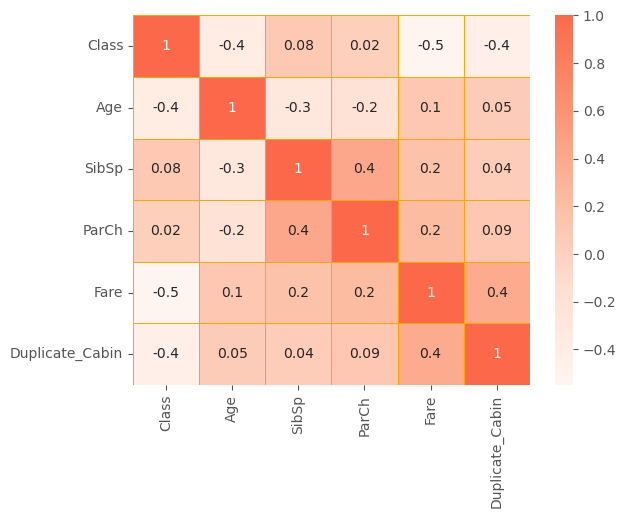

In [313]:
sns.heatmap(df_corr,
           fmt='.1g',
           linecolor='orange',
           linewidths=0.65,
           annot=True,
           center=True,
           cmap='Reds')

# Ask a question of the data

In [ ]:
df.query("Fare == 0")

I assume these are staff, is it necessary to impute age?

Other opportunities for feature engineering could include SibSp and ParCh

In [ ]:
df.to_csv('df_post_eda.csv')